In [1]:
# Import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
pip install --upgrade keras



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import keras
print(keras.__version__)


3.0.0


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define the image size
IMAGE_SIZE = [224, 224]

In [ ]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [ ]:
# Import the VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# Freeze all layers in the VGG16 model
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# Get the folders in the training data directory
folders = glob('chest_xray/train/*')

In [ ]:
# Add a flatten layer and a dense layer to the VGG16 model
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Compile the model
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)


In [ ]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory('chest_xray/train',
                         target_size = (224, 224),
                         batch_size = 10,
                         class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                      target_size = (224, 224),
                      batch_size = 10,
                      class_mode = 'categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Train the model
model.fit_generator(
 training_set,
 validation_data=test_set,
 epochs=1,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set)
)


522/522 [==============================] - 2353s 5s/step - loss: 0.1885 - accuracy: 0.9296 - val_loss: 0.6614 - val_accuracy: 0.8221


In [ ]:
img=image.load_img('chest_xray/test/Normal/IM-0001-0001.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)


In [ ]:
img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
result=int(classes[0][0])

In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA


In [ ]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []

In [ ]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 2s 2s/step


In [ ]:
true_labels

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [ ]:
type(true_labels)

list

In [ ]:
predicted_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
len(predicted_labels)

624

In [ ]:
len(true_labels)

624

In [ ]:
t_labels=np.array(true_labels)

In [ ]:
p_labels=np.array(predicted_labels)

In [ ]:
type(t_labels)

numpy.ndarray

In [ ]:
type(p_labels)

numpy.ndarray

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


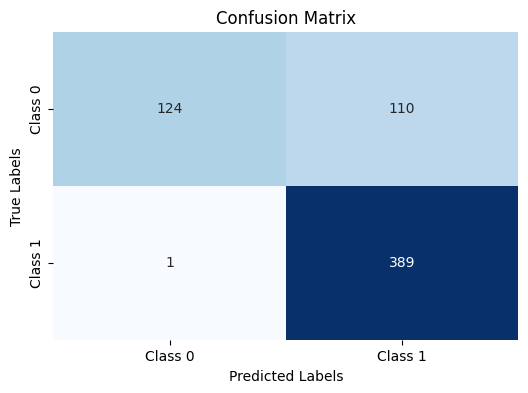

In [ ]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.8221153846153846
Precision : 0.779559118236473
Recall    : 0.9974358974358974
F1-score  : 0.875140607424072


In [ ]:
# Save the entire model as a binary file
#joblib.dump(model, 'vgg16_pneumonia_model.joblib')

['vgg16_pneumonia_model.joblib']

In [ ]:
model.save('/Users/hemu/Desktop/Updated_work_on_Deep_Learning/Research_work_on_Deep_Learning/Pneumonia/chest_xray/Pneumonia_models/VGG16_Cloud.h5')

NameError: name 'model' is not defined

In [1]:
pip install --upgrade keras


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.saving import pickle_utils

ImportError: cannot import name 'pickle_utils' from 'keras.saving' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/saving/__init__.py)